In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('df.pickle', 'rb') as f:
    dataset = pickle.load(f)

In [3]:
len(dataset)

57395

In [4]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
    n_total = len(df)                             # 데이터의 총 개수
    n_neg = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 1 개수
    n_pos = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 0 개수

    print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
    print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

    values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트 
    values.plot(kind='bar')
    print(values)

부정 댓글: 4648개, 8.10%
긍정 댓글: 52747개, 91.90%

1    52747
0     4648
Name: Label, dtype: int64


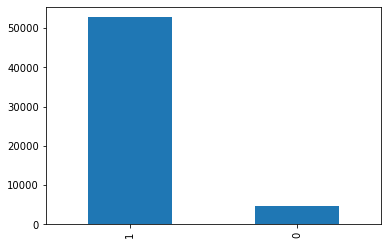

In [5]:
print_class_num(dataset, 'Label')

In [6]:
# 훈련데이터와 테스트데이터 분리
data = dataset['Review']
target = dataset['Label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target,random_state=24)

In [7]:
print('총 X 훈련 샘플의 수 : ', len(x_train))
print('총 y 훈련 샘플의 수 : ', len(y_train))
print('총 X 테스트 샘플의 수 : ', len(x_test))
print('총 y 테스트 샘플의 수 : ', len(y_test))

총 X 훈련 샘플의 수 :  45916
총 y 훈련 샘플의 수 :  45916
총 X 테스트 샘플의 수 :  11479
총 y 테스트 샘플의 수 :  11479


In [2]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

<AxesSubplot:>

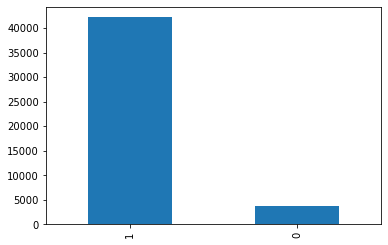

In [9]:
y_train.value_counts().plot(kind='bar')

In [10]:
X_train_list = x_train.tolist()
X_test_list = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [11]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [12]:
len(X_train_list)

45916

In [13]:
print(X_train[4].ids)

[2, 1110, 2088, 543, 2259, 5286, 12190, 794, 547, 904, 4009, 6667, 2470, 5600, 2200, 4550, 2259, 4182, 6233, 3864, 2097, 2223, 24563, 10559, 20152, 3760, 1560, 2073, 578, 4070, 2377, 2031, 2379, 4184, 2098, 2052, 3760, 7798, 2205, 2415, 2182, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# EDA 진행

In [16]:
tmp = list()
for i in range(len(X_train_list)):
    tmp.append(X_train[i].ids)

In [17]:
tmp = np.array(tmp)

In [18]:
tmp = pd.DataFrame.from_records(tmp)
tmp

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,2,3937,7285,2379,3254,13964,1083,2178,2250,2917,...,0,0,0,0,0,0,0,0,0,0
1,2,7325,4530,3822,4750,2170,6297,6396,1458,13964,...,0,0,0,0,0,0,0,0,0,0
2,2,1504,12099,2258,19125,4129,4550,2203,2182,3,...,0,0,0,0,0,0,0,0,0,0
3,2,3944,4550,2318,1521,2389,2359,2219,3606,25839,...,0,0,0,0,0,0,0,0,0,0
4,2,1110,2088,543,2259,5286,12190,794,547,904,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45911,2,3656,601,27135,2259,1521,1415,2259,575,7285,...,0,0,0,0,0,0,0,0,0,0
45912,2,1183,2116,3783,2259,2728,2420,2170,3656,2027,...,0,0,0,0,0,0,0,0,0,0
45913,2,8294,2121,2098,2052,21690,2182,3,0,0,...,0,0,0,0,0,0,0,0,0,0
45914,2,5124,2104,12756,2507,10283,4182,7285,3851,18158,...,0,0,0,0,0,0,0,0,0,0


In [19]:
tmp['Label'] = y_train

In [20]:
tmp = tmp[tmp.Label == 0]

In [21]:
tmp

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Label
65,2,5423,24502,2530,2073,3783,3683,823,2327,2200,...,0,0,0,0,0,0,0,0,0,0
95,2,7798,2205,24563,1560,2411,2470,2147,4182,2733,...,0,0,0,0,0,0,0,0,0,0
98,2,8786,3663,2057,5971,8223,4750,1891,1519,1889,...,0,0,0,0,0,0,0,0,0,0
115,2,1156,2532,728,2073,3782,2116,1513,2203,2182,...,0,0,0,0,0,0,0,0,0,0
116,2,1652,2569,2016,2113,2066,2116,2112,5081,2522,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,2,3760,2151,2935,2182,2100,4314,23220,1415,6028,...,0,0,0,0,0,0,0,0,0,0
45868,2,4181,2029,2731,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45894,2,3693,636,4029,615,2067,2270,9266,6996,2170,...,0,0,0,0,0,0,0,0,0,0
45904,2,6152,2116,1653,2052,7245,3689,3937,2031,2145,...,0,0,0,0,0,0,0,0,0,0


In [22]:
import random
rd_train = tmp.copy() #y_train중 부정레이블을 가지는 데이터프레임
rand_num = random.randint(1, 60) #1~29에서 서브워드 인코딩 벡터 에서 고를 인덱스

for i in range(len(rd_train)):
    if(int(rd_train.iloc[i, rand_num]) != 0 and int(rd_train.iloc[i, rand_num]) != 3): # PAD그리고 SEP가 아니면 / 둘 다 아닐경우
        rd_train.iloc[i, rand_num] = 4 # [MASK] id를 부여
    else :
        while True:
            rand_num = random.randint(1, 60)
            if(int(rd_train.iloc[i, rand_num]) != 0 and int(rd_train.iloc[i, rand_num]) != 3): #둘다 아닐떄 까지 반복
                rd_train.iloc[i, rand_num] = 4 # [MASK] id를 부여
                break
    rand_num = random.randint(1,60)

In [23]:
rd_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Label
65,2,5423,24502,2530,2073,3783,3683,823,2327,2200,...,0,0,0,0,0,0,0,0,0,0
95,2,7798,2205,24563,1560,2411,2470,2147,4182,2733,...,0,0,0,0,0,0,0,0,0,0
98,2,8786,3663,2057,5971,4,4750,1891,1519,1889,...,0,0,0,0,0,0,0,0,0,0
115,2,4,2532,728,2073,3782,2116,1513,2203,2182,...,0,0,0,0,0,0,0,0,0,0
116,2,1652,2569,2016,2113,2066,2116,2112,4,2522,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,2,3760,2151,2935,2182,2100,4314,4,1415,6028,...,0,0,0,0,0,0,0,0,0,0
45868,2,4181,4,2731,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45894,2,3693,636,4029,615,2067,2270,9266,6996,2170,...,0,0,0,0,0,0,0,0,0,0
45904,2,6152,2116,1653,2052,7245,3689,3937,2031,2145,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from tqdm import tqdm
rs_train = tmp.copy()

for i in tqdm(range(len(rs_train))):
    sep_index = rs_train.iloc[i].tolist().index(3) #문장의 끝을 나타낸다.
    if sep_index <= 2: #[CLS] + 토큰1 + [SEP] 인경우
        continue
    rand_1 = random.randint(1, sep_index-1)
    rand_2 = rand_1
    while rand_2 == rand_1:
        rand_2 = random.randint(1, sep_index-1)
    if (int(rs_train.iloc[i, rand_1]) != 0 and int(rs_train.iloc[i, rand_2]) != 0):
        rs_train.iloc[i, rand_1], rs_train.iloc[i, rand_2] = rs_train.iloc[i, rand_2], rs_train.iloc[i, rand_1]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3718/3718 [00:01<00:00, 3407.89it/s]


In [25]:
rs_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Label
65,2,5423,3783,2530,2073,24502,3683,823,2327,2200,...,0,0,0,0,0,0,0,0,0,0
95,2,7798,2205,24563,1560,2411,2470,2147,4182,2733,...,0,0,0,0,0,0,0,0,0,0
98,2,8786,3663,2057,5971,8223,4750,1891,1519,1889,...,0,0,0,0,0,0,0,0,0,0
115,2,1156,2203,728,2073,3782,2116,1513,2532,2182,...,0,0,0,0,0,0,0,0,0,0
116,2,1652,2569,2016,2113,2066,2181,2112,5081,2522,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,2,2151,3760,2935,2182,2100,4314,23220,1415,6028,...,0,0,0,0,0,0,0,0,0,0
45868,2,2029,4181,2731,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45894,2,3693,636,4029,615,2067,2270,9266,6996,2170,...,0,0,0,0,0,0,0,0,0,0
45904,2,6152,2116,1653,2052,7245,3689,3937,2031,2145,...,0,0,0,0,0,0,0,0,0,0


In [26]:
result_train = pd.concat([rs_train,rd_train], axis=0)

In [27]:
result_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Label
65,2,5423,3783,2530,2073,24502,3683,823,2327,2200,...,0,0,0,0,0,0,0,0,0,0
95,2,7798,2205,24563,1560,2411,2470,2147,4182,2733,...,0,0,0,0,0,0,0,0,0,0
98,2,8786,3663,2057,5971,8223,4750,1891,1519,1889,...,0,0,0,0,0,0,0,0,0,0
115,2,1156,2203,728,2073,3782,2116,1513,2532,2182,...,0,0,0,0,0,0,0,0,0,0
116,2,1652,2569,2016,2113,2066,2181,2112,5081,2522,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,2,3760,2151,2935,2182,2100,4314,4,1415,6028,...,0,0,0,0,0,0,0,0,0,0
45868,2,4181,4,2731,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45894,2,3693,636,4029,615,2067,2270,9266,6996,2170,...,0,0,0,0,0,0,0,0,0,0
45904,2,6152,2116,1653,2052,7245,3689,3937,2031,2145,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dict(X_train).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [29]:
extra_token_embedding = np.array(result_train.iloc[:,:61]).tolist()

In [30]:
len(extra_token_embedding[0])

61

In [31]:
X_train_dict = dict(X_train)

In [32]:
X_train_dict.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [33]:
X_train_dict['input_ids'].extend(extra_token_embedding)

In [35]:
result_train.index

Int64Index([   65,    95,    98,   115,   116,   136,   139,   141,   148,
              177,
            ...
            45793, 45801, 45803, 45808, 45847, 45851, 45868, 45894, 45904,
            45912],
           dtype='int64', length=7436)

In [36]:
extra_token_type_ids_list = list()
extra_attetion_mask_list = list()
for i in result_train.index:
    extra_token_type_ids_list.append(X_train[i].type_ids)
    extra_attetion_mask_list.append(X_train[i].attention_mask)
    
    

In [37]:
X_train_dict['token_type_ids'].extend(extra_token_type_ids_list)
X_train_dict['attention_mask'].extend(extra_attetion_mask_list)



In [38]:
y_train_add = y_train+list(result_train['Label'])

In [39]:
result_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,Label
65,2,5423,3783,2530,2073,24502,3683,823,2327,2200,...,0,0,0,0,0,0,0,0,0,0
95,2,7798,2205,24563,1560,2411,2470,2147,4182,2733,...,0,0,0,0,0,0,0,0,0,0
98,2,8786,3663,2057,5971,8223,4750,1891,1519,1889,...,0,0,0,0,0,0,0,0,0,0
115,2,1156,2203,728,2073,3782,2116,1513,2532,2182,...,0,0,0,0,0,0,0,0,0,0
116,2,1652,2569,2016,2113,2066,2181,2112,5081,2522,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45851,2,3760,2151,2935,2182,2100,4314,4,1415,6028,...,0,0,0,0,0,0,0,0,0,0
45868,2,4181,4,2731,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45894,2,3693,636,4029,615,2067,2270,9266,6996,2170,...,0,0,0,0,0,0,0,0,0,0
45904,2,6152,2116,1653,2052,7245,3689,3937,2031,2145,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    X_train_dict,
    y_train_add
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [5]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [8]:
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(5000).batch(32), epochs=5, batch_size=64,
    validation_data = val_dataset.shuffle(5000).batch(64),
    callbacks = [callback_earlystop]
)

Epoch 1/5
1668/1668 [==============================] - 1215s 728ms/step - loss: 0.0894 - accuracy: 0.9676 - val_loss: 0.1054 - val_accuracy: 0.9626
Epoch 2/5
1668/1668 [==============================] - 1165s 699ms/step - loss: 0.0520 - accuracy: 0.9808 - val_loss: 0.1171 - val_accuracy: 0.9647
Epoch 3/5
1668/1668 [==============================] - 1195s 716ms/step - loss: 0.0365 - accuracy: 0.9873 - val_loss: 0.1037 - val_accuracy: 0.9686
Epoch 4/5
1668/1668 [==============================] - 1159s 695ms/step - loss: 0.0278 - accuracy: 0.9909 - val_loss: 0.1396 - val_accuracy: 0.9634
Epoch 5/5
1668/1668 [==============================] - 1177s 706ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.1785 - val_accuracy: 0.9652


In [46]:
model.evaluate(val_dataset.batch(1024))

12/12 [==============================] - 52s 4s/step - loss: 0.1785 - accuracy: 0.9652


[0.178471639752388, 0.9652408957481384]

In [17]:
model.save_pretrained('nsmc_model/bert-base-EDA')
tokenizer.save_pretrained('nsmc_model/bert-base-EDA')

NameError: name 'model' is not defined

In [9]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained('nsmc_model/bert-base-EDA')
loaded_model = TFBertForSequenceClassification.from_pretrained('nsmc_model/bert-base-EDA')
text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at nsmc_model/bert-base were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nsmc_model/bert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
C:\Users\DanielJeong\AppData\Roaming\Python\Python39\site-packages\tr

In [10]:
text_classifier('위생불량')[0]

[{'label': 'LABEL_0', 'score': 0.9998254179954529},
 {'label': 'LABEL_1', 'score': 0.00017456912610214204}]

In [22]:
text_classifier('맛은 있는데 알바들이 불친절하네요')[0]

[{'label': 'LABEL_0', 'score': 0.40184080600738525},
 {'label': 'LABEL_1', 'score': 0.5981591939926147}]

In [23]:
text_classifier('알바들이 불친절하네요')[0]

[{'label': 'LABEL_0', 'score': 0.9997460246086121},
 {'label': 'LABEL_1', 'score': 0.0002540088607929647}]

In [24]:
text_classifier('시끄러워요. 가성비는 좋네')[0]

[{'label': 'LABEL_0', 'score': 0.08259069174528122},
 {'label': 'LABEL_1', 'score': 0.9174093008041382}]

In [25]:
text_classifier('소음')[0]

[{'label': 'LABEL_0', 'score': 0.9905909895896912},
 {'label': 'LABEL_1', 'score': 0.009409046731889248}]

In [58]:
text_classifier('자리가 협소하다')[0]

[{'label': 'LABEL_0', 'score': 0.2659810483455658},
 {'label': 'LABEL_1', 'score': 0.7340189814567566}]

In [92]:
text_classifier('이건 부정인가 긍정인가')[0]

[{'label': 'LABEL_0', 'score': 0.9996070265769958},
 {'label': 'LABEL_1', 'score': 0.00039294123416766524}]

In [93]:
text_classifier('재방문 의사 없음')[0]

[{'label': 'LABEL_0', 'score': 0.9998223185539246},
 {'label': 'LABEL_1', 'score': 0.00017767107055988163}]

In [12]:
text_classifier('자리가 협소하네')[0]

[{'label': 'LABEL_0', 'score': 0.4823484420776367},
 {'label': 'LABEL_1', 'score': 0.5176515579223633}]

In [95]:
text_classifier('시끄럽다')[0]

[{'label': 'LABEL_0', 'score': 0.9832868576049805},
 {'label': 'LABEL_1', 'score': 0.016713133081793785}]

In [27]:
text_classifier('기다려도 나오지 않네요')[0]

[{'label': 'LABEL_0', 'score': 0.9998397827148438},
 {'label': 'LABEL_1', 'score': 0.00016017913003452122}]

In [102]:
text_classifier('코로나 위험있는 가게')

[[{'label': 'LABEL_0', 'score': 0.2588971257209778},
  {'label': 'LABEL_1', 'score': 0.7411028742790222}]]

In [26]:
text_classifier('주차자리가 협소하다')

[[{'label': 'LABEL_0', 'score': 0.04674851894378662},
  {'label': 'LABEL_1', 'score': 0.9532514214515686}]]

In [13]:
text_classifier('협소')[0]

[{'label': 'LABEL_0', 'score': 0.15053407847881317},
 {'label': 'LABEL_1', 'score': 0.8494659662246704}]

In [14]:

text_classifier('따닥따닥')[0]

[{'label': 'LABEL_0', 'score': 0.10642120242118835},
 {'label': 'LABEL_1', 'score': 0.893578827381134}]

In [15]:
text_classifier('자리가 협소하네')[0]

[{'label': 'LABEL_0', 'score': 0.4823484420776367},
 {'label': 'LABEL_1', 'score': 0.5176515579223633}]

In [16]:
text_classifier('자리가 널찍해서 좋네요')[0]

[{'label': 'LABEL_0', 'score': 0.0006728653097525239},
 {'label': 'LABEL_1', 'score': 0.9993271827697754}]

In [17]:
text_classifier('자리')[0]

[{'label': 'LABEL_0', 'score': 0.3686814606189728},
 {'label': 'LABEL_1', 'score': 0.6313185691833496}]

In [18]:
text_classifier('코로나')

[[{'label': 'LABEL_0', 'score': 0.03232031315565109},
  {'label': 'LABEL_1', 'score': 0.9676796793937683}]]